In [2]:
!pip install -qqq nltk

In [35]:
%%file task3.py

from mrjob.job import MRJob, MRStep

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.util import bigrams

class MRBigrams(MRJob):
    def mapper_init(self):
         nltk.download('punkt')
         nltk.download('stopwords')

    
    def mapper(self, _, line):
        if not line.startswith('"character" "dialogue"'):
            _, _, phrase = line.split(" ", 2)
            p = phrase.strip('"').strip("\\")
            words = word_tokenize(p)
            stop_words = set(stopwords.words('english'))
            
            # в задании явно не указано убирать стоп слова, но по примеру кажется что надо
            words = [word for word in words if word.isalnum() and word not in stop_words]
            
            words = [word.lower() for word in words]
            for b in list(bigrams(words)):
                yield b, 1

    def reducer_aggregate(self, bigram, counts):
        yield None, (bigram, sum(counts))

    def reducer(self, _, pairs):
        bigram2cnt = [(f'{p[0][0]} {p[0][1]}', p[1]) for p in pairs]
        yield from sorted(bigram2cnt, key=lambda x: -x[1])[:20]

    def steps(self):
        return [
            MRStep(
                mapper_init=self.mapper_init,
                mapper=self.mapper,
                reducer=self.reducer_aggregate,
            ),
            MRStep(reducer=self.reducer)
        ]

if __name__ == "__main__":
    MRBigrams.run()

Overwriting task3.py


In [36]:
!python3 task3.py ../sw-data/SW_EpisodeIV.txt > res4_local.txt && cat res4_local.txt

No configs found; falling back on auto-configuration
No configs specified for inline runner
Creating temp directory /tmp/task3.root.20231206.205043.301961
Running step 1 of 2...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloadi

In [37]:
!python3 task3.py ../sw-data/SW_EpisodeV.txt > res5_local.txt && cat res5_local.txt

No configs found; falling back on auto-configuration
No configs specified for inline runner
Creating temp directory /tmp/task3.root.20231206.205045.401413
Running step 1 of 2...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloadi

In [38]:
!python3 task3.py ../sw-data/SW_EpisodeVI.txt > res6_local.txt && cat res6_local.txt

No configs found; falling back on auto-configuration
No configs specified for inline runner
Creating temp directory /tmp/task3.root.20231206.205046.627428
Running step 1 of 2...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloadi

In [39]:
!python3 task3.py ../sw-data/SW_full.txt > res_full_local.txt && cat res_full_local.txt

No configs found; falling back on auto-configuration
No configs specified for inline runner
Creating temp directory /tmp/task3.root.20231206.205050.869532
Running step 1 of 2...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloadi

In [42]:
import matplotlib.pyplot as plt


def print_result(result, ep):
    with open(result, "r") as file:
        lines = file.readlines()
    names, counts = zip(*(line.split('\t') for line in lines))
    names = [i[1:-1] for i in names]
    counts = [int(i.strip()) for i in counts]
    plt.figure(figsize=(18, 6))
    plt.bar(names, counts)
    plt.xlabel('bigram')
    plt.xticks(rotation='vertical')
    plt.ylabel('count')
    plt.title(f'Most common bigrams. {ep}')
    plt.savefig(f'{ep}.png')
    plt.show()

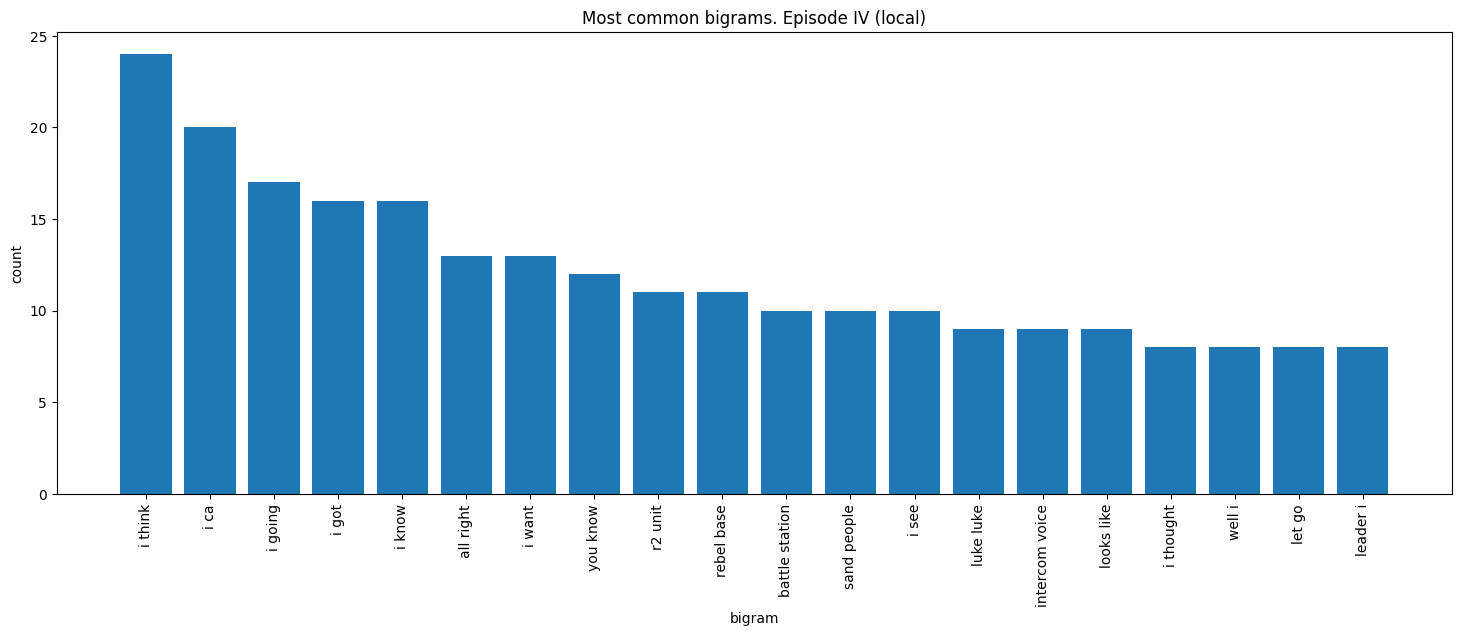

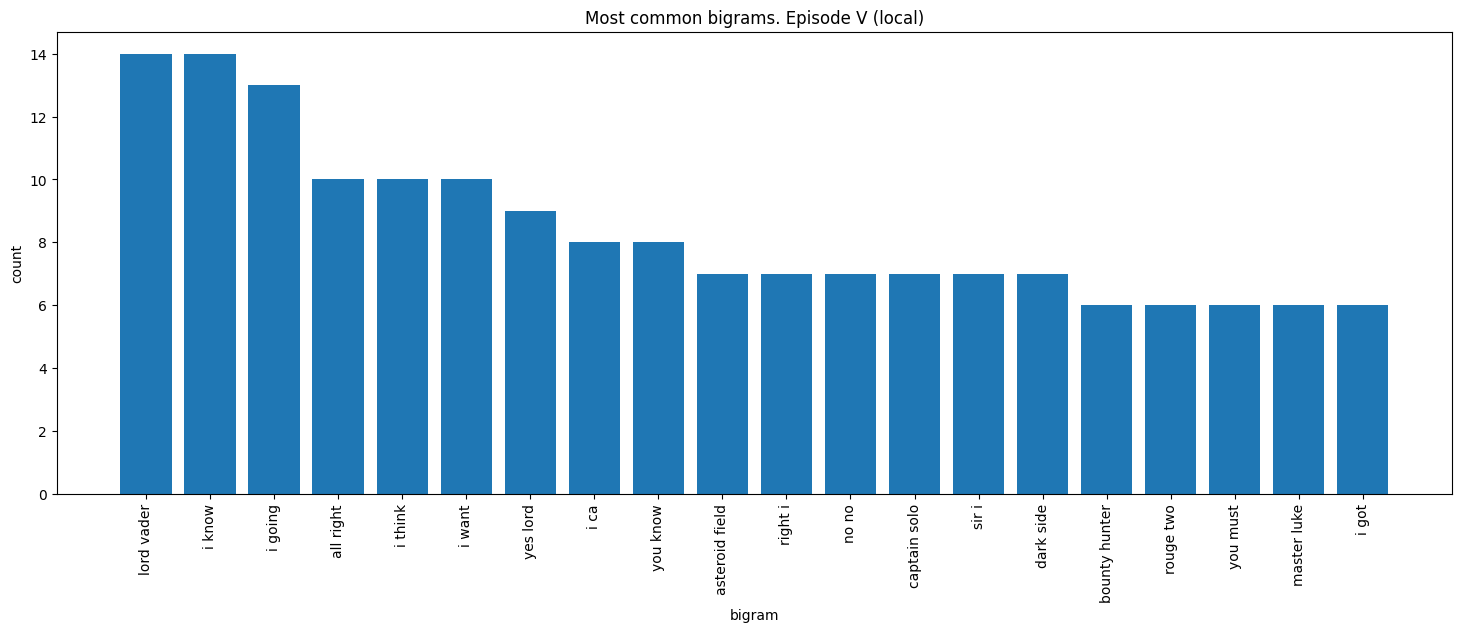

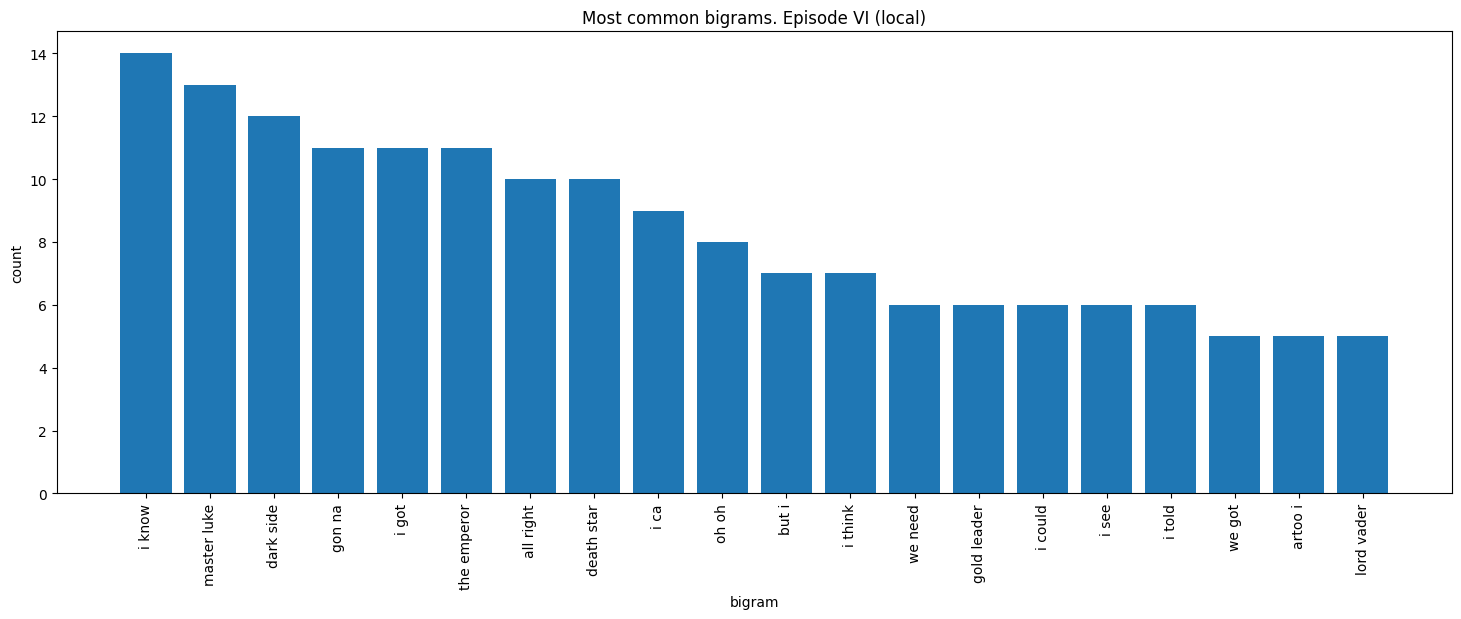

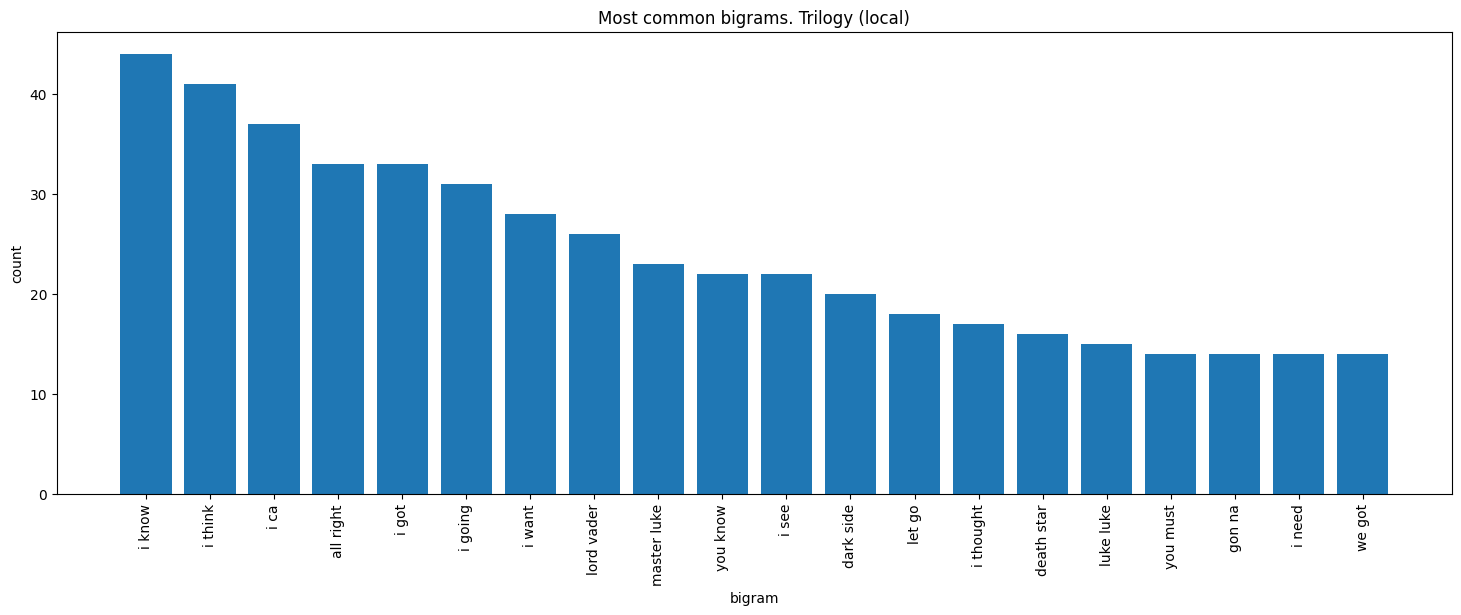

In [43]:

results = [
    ('res4_local.txt', 'Episode IV (local)'),
    ('res5_local.txt', 'Episode V (local)'),
    ('res6_local.txt', 'Episode VI (local)'),
    ('res_full_local.txt', 'Trilogy (local)'),
]

for r, ep in results:
    print_result(r, ep)